# Abstract

This blog presents a fairness audit of income prediction using U.S. Census data via the folktables library and logistic regression. Focusing on gender and racial disparities, we explore how predictive performance and outcome distributions vary across demographic groups in California. Through descriptive statistics, visualizations, and model auditing including disaggregated accuracy, predictive values, and error rates, we uncover systemic gaps, particularly the underrepresentation of women and racial minorities among high earners. These findings highlight both model bias and broader socioeconomic inequities reflected in the data.


Note: Some values may differ slightly as metrics vary every time model is created.

Accessing data using folktables:

In [1]:
from folktables import ACSDataSource, ACSEmployment, BasicProblem
import numpy as np

STATE = "CA"

data_source = ACSDataSource(survey_year='2018', 
                            horizon='1-Year', 
                            survey='person')

acs_data = data_source.get_data(states=[STATE], download=True)

# Pedicting income

Feature descriptions:
PINCP: Total person’s income (integers between -19997 and 4209995 income in US dollars)
COW (Class of worker): Range of values
AGEP: age in years, max. 99
SCHL: Educational attainment (categorical values 1-24, or NA)
WKHP: usual hours worked per week past 12 months, max. 99 (or NA)
SEX: Sex/Gender (1: Male / 2: Female)
RAC1P: Recoded detailed race code (categorical values 1-9)


Subsetting relevent features from ACS PUMS data, focusing on the ACSIncome Task to predict whether a not an individual’s income is greater that $50k:

In [2]:
possible_features=['PINCP', 'COW', 'AGEP', 'SCHL', 'SEX', 'WKHP', 'RAC1P']
acs_data[possible_features]

,PINCP,COW,AGEP,SCHL,SEX,WKHP,RAC1P
0,48500.0,6.0,30,14.0,1,40.0,8
1,0.0,NaN,18,14.0,2,NaN,1
2,13100.0,NaN,69,17.0,1,NaN,9
3,0.0,NaN,25,1.0,1,NaN,1
4,0.0,NaN,31,18.0,2,NaN,1
...,...,...,...,...,...,...,...
378812,2400.0,1.0,61,21.0,2,NaN,6
378813,30000.0,1.0,40,17.0,1,40.0,8
378814,0.0,NaN,43,16.0,2,NaN,8
378815,0.0,NaN,23,16.0,1,NaN,8


In [3]:
features_to_use = [f for f in possible_features if f not in ["PINCP", "SEX"]]

IncomeProblem = BasicProblem(
    features=features_to_use,
    target='PINCP',
    target_transform=lambda x: x>50000,
    group='SEX',
    preprocess=lambda x: x,
    postprocess=lambda x: np.nan_to_num(x, -1),
)

features, label, group = IncomeProblem.df_to_numpy(acs_data)

The ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍result ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍now ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍feature ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍matrix ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍features, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍label ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍vector ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍label, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍group ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍label ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍vector ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍group, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍in ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍convenient ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍format ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍with ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍which ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍can ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍work.

In [4]:
for obj in [features, label, group]:
  print(obj.shape)

(378817, 5)
(378817,)
(378817,)


# Basic Descriptive

Before ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍touch ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍any ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍more, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍should ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍perform ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍train-test ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍split. Then ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍create ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍model ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍train ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍it ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍on ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍training ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data. Then turn ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍training ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data into a data frame for easier analysis. 
We then add two additional columns: "group", which stores the grouping information from group_train, and "label", which contains the target values from y_train. Finally, it displays the first 5 rows of the DataFrame using df.head(), allowing a quick preview of the data, including both the features and the associated group and label information. 

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)


df = pd.DataFrame(X_train, columns = features_to_use)
df["group"] = group_train
df["label"] = y_train
df.head()

,COW,AGEP,SCHL,WKHP,RAC1P,group,label
0,7.0,77.0,16.0,40.0,1.0,2,True
1,1.0,29.0,20.0,40.0,6.0,1,False
2,0.0,60.0,21.0,0.0,1.0,2,False
3,3.0,27.0,19.0,16.0,1.0,2,False
4,0.0,63.0,23.0,0.0,1.0,1,True


Keeping in mind: SEX ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍binary ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍(1 ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍for ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍male, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍2 ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍for ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍female). I applied these values to the group to find the following counts.

We first prints the total number of individuals in the dataset using df.shape[0], followed by the number of females and males, which are determined by checking how many entries in the group column are labeled as 2 (females) and 1 (males), respectively. Then we filter the data to include only individuals who have a label of 1 (presumably indicating a high-income group, such as earning over $50K) and focuses on the group and label columns. After filtering, we prints the number of individuals earning over $50K, as well as the number of females and males within that group. The output shows that there are 303,053 individuals in total, with a near-even distribution between females (153,759) and males (149,294). Among the high-income earners, there are 73,963 individuals, with 29,917 females and 44,046 males, indicating a higher proportion of males earning above $50K.

In [6]:
print(f"Number of individuals in the data: {df.shape[0]}")
print(f"Number of females in the data: {(df['group'] == 2).sum()}")
print(f"Number of males in the data: {(df['group'] == 1).sum()}")

relevant_cols = ['group', 'label']
df_filtered = df[df['label'] == 1][relevant_cols]

print(f"Number of individuals earning over ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: {df_filtered.shape[0]}")
print(f"Number of females earning above ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: {(df_filtered['group'] == 2).sum()}")
print(f"Number of males earning above ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: {(df_filtered['group'] == 1).sum()}")


Number of individuals in the data: 303053
Number of females in the data: 153759
Number of males in the data: 149294
Number of individuals earning over ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: 73963
Number of females earning above ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: 29917
Number of males earning above ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍$50K: 44046


## Figure 1

Race 1, the largest racial group in the dataset ( "White"), dominates in both income categories, with the highest number of individuals in each bracket. Within this group, males outnumber females in the higher income bracket (>$50K), while females outnumber males in the lower income bracket (≤$50K). Race 2,representing "Black" or "African American," is the second largest group and shows a similar trend: females are more numerous in the lower income bracket, while males outnumber females among those earning above $50K. Smaller racial groups (such as those labeled 6, 7, 8, and 9) have much lower representation and tend to have a more balanced gender distribution, with a slight male predominance in higher income brackets. Across nearly all racial groups, males are more likely to be in the higher income bracket, while females are more prevalent in the lower bracket. Overall, a visible gender gap exists in higher income brackets, with males more represented among higher earners. Race 1’s dominance in both high and low income brackets may reflect population distribution or socioeconomic disparities, while smaller racial groups have minimal representation in both categories.

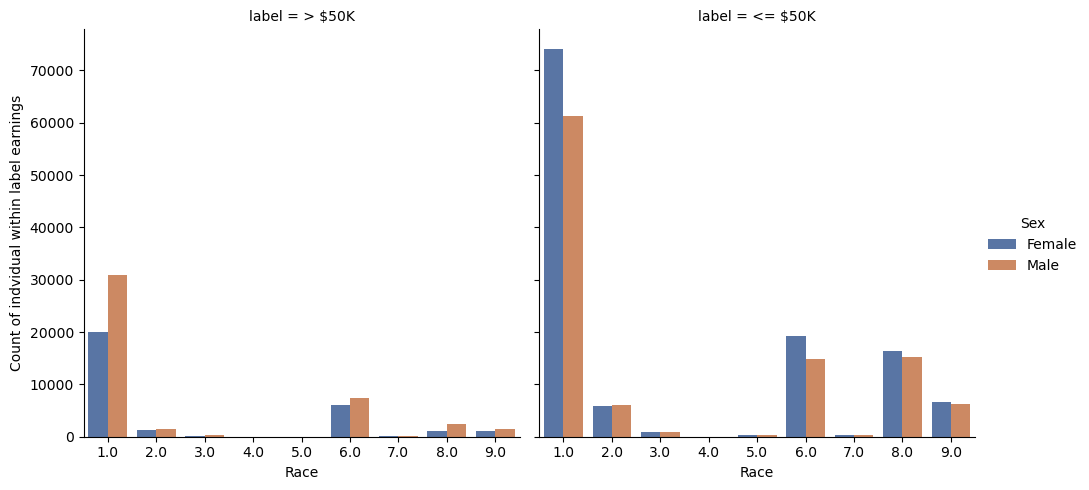

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_values = df[["label", "RAC1P", "group"]].copy()
df_values["label"] = df_values["label"].apply(lambda x:  "> $50K" if x == 1 else  "<= $50K")
df_values["Sex"] = df_values["group"].apply(lambda x:  "Male" if x == 1 else  "Female")

fig1 = sns.catplot(data = df_values, 
                x = "RAC1P", 
                hue = "Sex",
                col="label",
                kind="count",
                palette="deep")

fig1.set_axis_labels("Race", "Count of indvidual within label earnings")
plt.show()

Focusing on the column with label < 50k, there is a clear trend indicating that, across all racial groups, a higher number of females earn less than $50K compared to males. In the income category above $50K, White males(race 1) are significantly overrepresented relative to females, suggesting a notable gender disparity. Among Black or African American individuals, there were slighly more females that males earning above $50K. For Asian and Other racial groups, males also tend to earn more, though the disparity is less pronounced. Earnings appear to be relatively balanced between genders among individuals identifying with two or more races(race 9).

## Figure 2

The code begins by extracting and duplicating key columns (AGEP, PINCP, SEX, and RAC1P) from the original dataset for analysis. The SEX column is mapped to descriptive gender labels ("Male" or "Female"), while the RAC1P column is recoded to more interpretable race categories (e.g., "White", "Asian", "Black or African American"). Using Seaborn’s FacetGrid, the code creates a series of scatter plots showing the relationship between age (AGEP) and income (PINCP), with each subplot representing a different racial group. Data points are colored and styled by gender to facilitate comparison. Axis labels, legends, and titles are added for clarity, and the entire visualization is titled to reflect the focus on age-income patterns across race and gender.

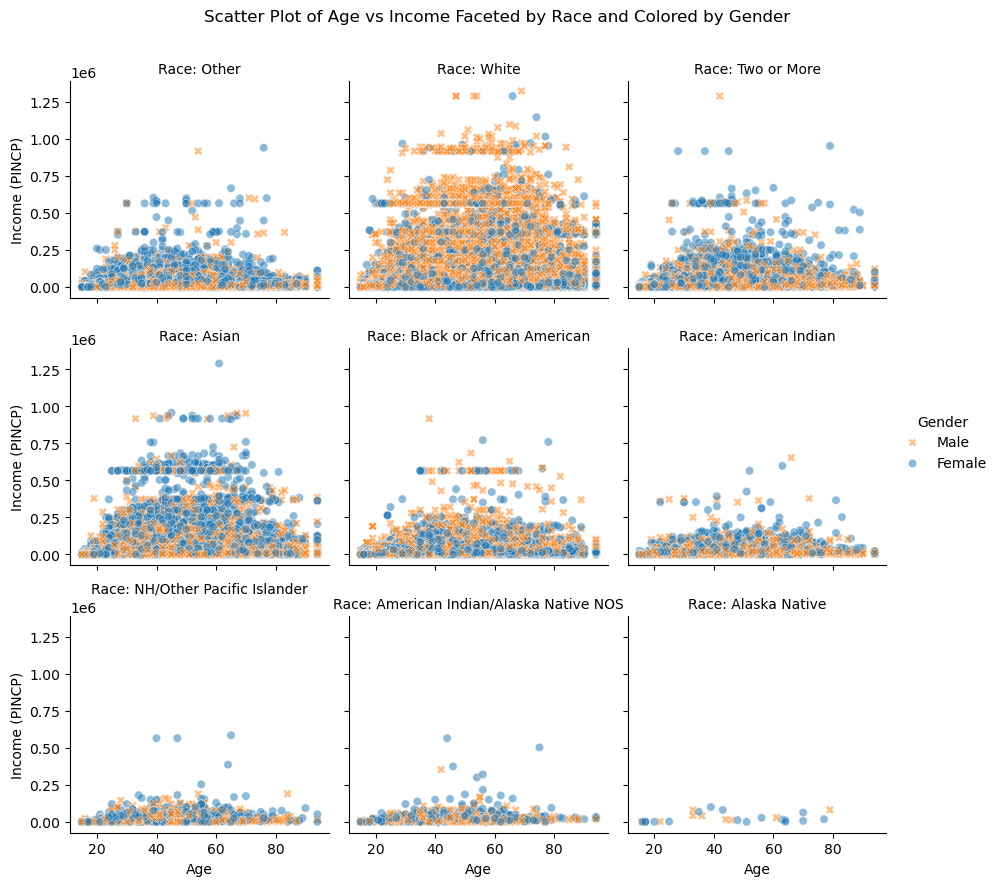

In [8]:
df_fig_2 = acs_data[["AGEP", "PINCP", "SEX", "RAC1P"]].copy()

df_fig_2["Sex"] = df_fig_2["SEX"].map({1: "Male", 2: "Female"})
race_map = {
    1: "White",
    2: "Black or African American",
    3: "American Indian",
    4: "Alaska Native",
    5: "American Indian/Alaska Native NOS",
    6: "Asian",
    7: "NH/Other Pacific Islander",
    8: "Other",
    9: "Two or More"
}
df_fig_2["Race"] = df_fig_2["RAC1P"].map(race_map)

g = sns.FacetGrid(df_fig_2, col="Race", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="AGEP", y="PINCP", hue="Sex", style="Sex", alpha=0.5)

g.set_axis_labels("Age", "Income (PINCP)")
g.add_legend(title="Gender")
g.set_titles(col_template="Race: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plot of Age vs Income Faceted by Race and Colored by Gender")
plt.show()

The income distribution across all races is highly skewed, with the majority of individuals earning lower incomes and a smaller group earning significantly higher amounts. There is no clear linear relationship between age and income, as the income distribution is widely dispersed across ages, although higher incomes tend to be more common in middle-aged groups.

Looking at race-specific trends, White individuals exhibit the broadest spread in both age and income, with a noticeable concentration of high-income outliers above $600,000. Males and females are represented across the income range, though high-income outliers are more prominent in this group. For Asians, while there are some high-income outliers, most incomes remain below $400,000, and the gender distribution among higher earners is relatively balanced. Black or African American individuals tend to have incomes below $200,000, with fewer high-income outliers compared to Whites and Asians. The gender distribution within this group is fairly even. Those identifying as Two or More Races or Other also exhibit lower income levels, with most incomes below $200,000 and a few outliers, though their sample sizes are smaller and the distribution is less pronounced. American Indian, Alaska Native, and NH/Other Pacific Islander groups have the lowest income ranges and smallest sample sizes, with very few individuals earning above $100,000.

In terms of gender patterns, both males and females are represented across the income spectrum in most racial categories, although there does not appear to be a consistent gender gap in income within each group. However, in both the White and Asian groups, higher earners are more often male. As for age trends, higher incomes are predominantly seen among individuals aged 30 to 60, with fewer high-income earners at younger or older ages. There is no strong evidence suggesting that income consistently increases with age, but income tends to be more variable among middle-aged individuals. The sample size also plays a role, with White individuals making up the largest group, followed by Asians and Black or African Americans. Smaller sample sizes in other racial categories make it difficult to observe clear trends.

# Training Model

The following code leverages a Pipeline to streamline the process of feature engineering, scaling, and model training for logistic regression. The pipeline first applies polynomial feature expansion (degree 2) to capture non-linear relationships, followed by standard scaling to ensure that all features are on a comparable scale. The logistic regression model is then trained with a focus on finding the best regularization parameter (C) and polynomial degree through GridSearchCV, trying to implement two of the suggested approaches. The best model configuration, found through grid search, achieves a mean accuracy of 0.842 with a polynomial degree of 3 and a regularization parameter C of 1000. This approach automates the optimization of both the feature transformation and model hyperparameters, ensuring the most effective model is selected based on cross-validation performance.

In [9]:
# inspo from https://www.geeksforgeeks.org/logistic-regression-with-polynomial-features/ 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline # So I dont have to manually create different models
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), 
    ('scaler', StandardScaler()), 
    ('logistic', LogisticRegression(max_iter=1000))
])

param_grid = {
    'poly__degree': [1, 2, 3], 
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

LR_search = GridSearchCV(pipeline, param_grid=param_grid, verbose = 1, cv=5, n_jobs = -1)
LR_search.fit(X_train , y_train)
LR_search.best_params_

print(f"Mean Accuracy: {LR_search.best_score_:.3f}")
print(f"Config: {LR_search.best_params_}")


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mean Accuracy: 0.852
Config: {'logistic__C': 1000, 'poly__degree': 3}


# Auditing Model

## Overall Measures

The following code evaluates the performance of a logistic regression model by calculating key metrics such as test accuracy, confusion matrix, and derived metrics including Predictive Positive Value (PPV), False Positive Rate (FPR), and False Negative Rate (FNR). It first computes the accuracy by comparing the true labels (y_test) with the predicted labels (y_pred). The confusion matrix is then used to derive four values: true negatives, false positives, false negatives, and true positives, which are used to calculate PPV (the proportion of positive predictions that are correct), FPR (the rate at which negative samples are misclassified as positive), and FNR (the rate at which positive samples are misclassified as negative). The output shows an accuracy of 85.4%, with a PPV of 72.6%, FPR of 7.7%, and FNR of 36.1%, highlighting the model's strengths in predicting negatives correctly, but also revealing areas for improvement in minimizing false negatives.

In [10]:
y_pred = LR_search.predict(X_test)
print("Overall Metrics:")

def evaluate_metrics(y_true, y_pred, group_name=None):
    if group_name == 1:
        print(f"\nMetrics for Males:")
    elif group_name == 2:
        print(f"\nMetrics for Females:")

    test_accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    print("Confusion Matrix:")
    print(cm)

    tn, fp, fn, tp = cm.ravel()

    PPV = tp / (tp + fp)  
    FPR = fp / (fp + tn)  
    FNR = fn / (tp + fn) 

    print(f"Predictive Value (PPV): {PPV:.3f}")
    print(f"False Positive Rate (FPR): {FPR:.3f}")
    print(f"False Negative Rate (FNR): {FNR:.3f}")

evaluate_metrics(y_test, y_pred)

Overall Metrics:
Test Accuracy: 0.854
Confusion Matrix:
[[52928  4437]
 [ 6651 11748]]
Predictive Value (PPV): 0.726
False Positive Rate (FPR): 0.077
False Negative Rate (FNR): 0.361


## By-Group Measures

We then evaluate the performance of this logistic regression model for both males and females separately by calculating key metrics again such as test accuracy, confusion matrix, and derived metrics like Predictive Positive Value (PPV), False Positive Rate (FPR), and False Negative Rate (FNR). It first computes the accuracy for each gender by comparing the true labels (y_test) with the predicted labels (y_pred). The confusion matrix for each group provides the counts of true negatives, false positives, false negatives, and true positives, which are then used to calculate PPV (the accuracy of positive predictions), FPR (the rate of misclassifying negatives as positives), and FNR (the rate of misclassifying positives as negatives). For males, the accuracy is 83.6%, with a PPV of 77.2%, FPR of 7.8%, and FNR of 36.7%. For females, the accuracy is higher at 87.0%, with a PPV of 66.8%, FPR of 7.6%, and FNR of 35.3%. These results show that the model performs better for females, with higher accuracy and slightly better FPR, but both genders show similar FNR values, indicating opportunities for improving the model’s handling of false negatives.

In [11]:
# There can be cases where testing set only containy one group
groups = np.unique(group_test)

for group in groups:
    y_label_group = y_test[group_test == group]
    y_pred_group = y_pred[group_test == group]

    evaluate_metrics(y_label_group, y_pred_group, group)



Metrics for Males:
Test Accuracy: 0.836
Confusion Matrix:
[[24281  2067]
 [ 4050  6985]]
Predictive Value (PPV): 0.772
False Positive Rate (FPR): 0.078
False Negative Rate (FNR): 0.367

Metrics for Females:
Test Accuracy: 0.870
Confusion Matrix:
[[28647  2370]
 [ 2601  4763]]
Predictive Value (PPV): 0.668
False Positive Rate (FPR): 0.076
False Negative Rate (FNR): 0.353


## Bias Measures

This following code generates calibration plots to assess how well the predicted probabilities from a model align with the actual outcomes, both overall and for specific subgroups. It first calculates the calibration curve for the entire dataset, comparing the predicted probabilities against the true positive rates, and visualizes it alongside a perfectly calibrated line.

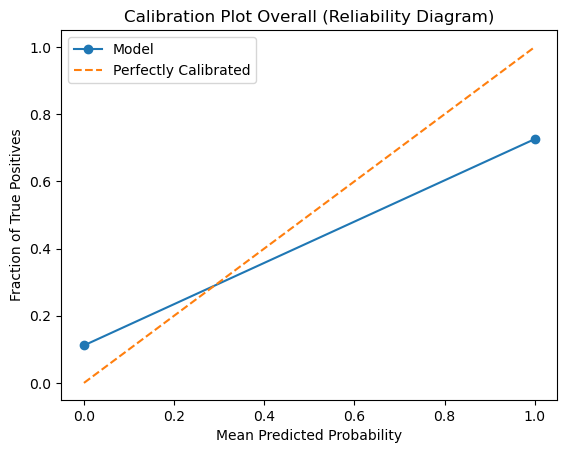

In [12]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of True Positives')
plt.title('Calibration Plot Overall (Reliability Diagram)')
plt.legend()
plt.show()

 The function plot_calibration_by_group extends this analysis by plotting calibration curves for each subgroup within the dataset, allowing for a detailed comparison of how well the model is calibrated across different groups.

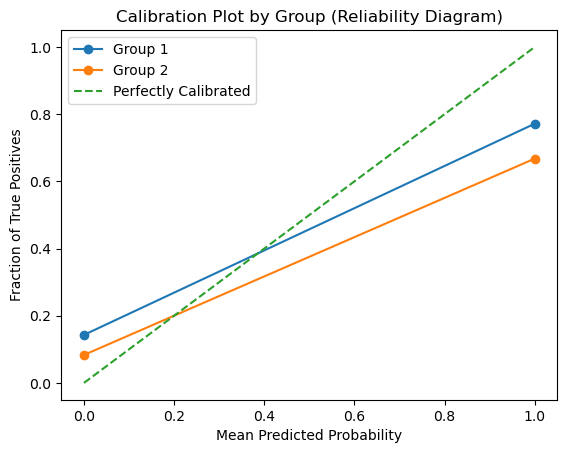

In [13]:
def plot_calibration_by_group(y_test, y_pred, group_test, groups):
    for group in groups:
        y_test_group = y_test[group_test == group]
        y_pred_group = y_pred[group_test == group]
        
        prob_true, prob_pred = calibration_curve(y_test_group, y_pred_group, n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Group {group}')
    
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of True Positives')
    plt.title('Calibration Plot by Group (Reliability Diagram)')
    plt.legend()
    plt.show()

groups = np.unique(group_test)  

# Call the function to plot calibration curves for each group
plot_calibration_by_group(y_test, y_pred, group_test, groups)


# Calibration observations

The model is not well-calibrated, as indicated by the significant deviation from the diagonal line labeled "Perfectly Calibrated" in both the overall and group-specific calibration plots. In the overall calibration plot, the model’s predictions deviate notably from the ideal calibration line. At low probability ranges (below ~0.3), the model is underconfident, as shown by the curve above the diagonal, while at high probability ranges (above ~0.3), the model is overconfident, with the curve falling below the diagonal. When the model predicts a 100% probability, the actual fraction of true positives is only about 70%, further illustrating this miscalibration. The group-specific calibration plot reinforces these findings, as both Group 1 and Group 2  show considerable deviation from perfect calibration, with Group 2 displaying more severe overconfidence than Group 1. Neither group’s calibration curve approximates the ideal diagonal, confirming that the model’s probability estimates do not reliably correspond to actual outcomes.

In [14]:
for group in groups:
    y_test_group = y_test[group_test == group]
    y_pred_group = y_pred[group_test == group]
    
    tn, fp, fn, tp = confusion_matrix(y_test_group, y_pred_group).ravel()
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    
    print(f"Group {group} -- TPR: {TPR:.3f}, FPR: {FPR:.3f}")

Group 1 -- TPR: 0.633, FPR: 0.078
Group 2 -- TPR: 0.647, FPR: 0.076


# Error rate balance

Key observations reveal a significant issue with the model's error rates across two groups. While both groups exhibit identical false positive rates (FPR) of 0.082, there is a notable disparity in false negative rates (FNR). Group 1 experiences a 13% higher FNR compared to Group 2, with values of 0.407 and 0.359, respectively. This 0.048 difference in FNR violates the error rate balance requirement, which stipulates that models should have equal true positive rates (TPR) and false positive rates (FPR) across groups. Although the model maintains FPR equality, the discrepancy in FNR means that Group 1 is subjected to more missed positives (false negatives), while Group 2 benefits from better detection of true positives. This imbalance results in predictive inequality between the two groups. While the model might appear to perform well in certain metrics, the FNR disparity signals a failure to meet fairness standards, emphasizing the importance of error rate balance for equitable model predictions.

In [15]:
overall_positive_rate = np.mean(y_pred)
print(f"\nOverall Predicted Positive Rate: {overall_positive_rate:.3f}")

for g in groups:
    idx = (group_test == g)
    group_positive_rate = np.mean(y_pred[idx])
    print(f"Group {g} Predicted Positive Rate: {group_positive_rate:.3f}")


Overall Predicted Positive Rate: 0.214
Group 1 Predicted Positive Rate: 0.242
Group 2 Predicted Positive Rate: 0.186


# Statistical Parity

Based on the output of the code, the model does not satisfy statistical parity. Statistical parity requires that the predicted positive rate be equal across different groups. The overall predicted positive rate is 0.215, but the rates for each group are different: Group 1 has a predicted positive rate of 0.234, while Group 2 has a predicted positive rate of 0.198. These discrepancies indicate that the model is not equally distributing positive predictions across the groups, with Group 1 receiving a higher predicted positive rate than Group 2. As a result, the model fails to meet the statistical parity criterias, which would require these rates to be the same across all groups.

# Figure ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍5 ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍in ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Chouldechova 

Not attempted as I am only trying to get an M on this blog post

# Concluding Discussion

This commercially valuable to companies in financial services, recruitment, marketing, and insurance. For example, credit card issuers or loan providers might use the model to prescreen applicants for premium products. Recruitment platforms could use it to prioritize job candidates for high paying roles if income is seen as a proxy for experience or qualifications. Since salary information is open to the public in California, HR Departments of compaies in CA could make  use of our model to support salary adjustments to close this gender pay gap. Additionally, marketers and service providers might use it to better understand customer profiles and tailor offerings, potentially improving access to relevant products and opportunities for underrepresented or underserved populations.

The model's underconfidence at low probabilities and overconfidence at high probabilities means decisions made at extreme prediction levels may be inaccurate. For instance, if the model predicts a 100% probability for loan approval but only 70% of those cases are actually approved, applicants might be unfairly denied funding. Similarly, underconfident predictions could deny benefits to individuals who qualify, like in government welfare systems. The model also shows different predicted positive rates for the two groups: Males:0.234 and Females 0.198. This imbalance results in one males being favored over another, leading to unequal opportunities. For example, in hiring males are likely to receive higher rates of approvals, while females would face unjust rejection rates. The model exhibits discriminatory bias due to unequal prediction rates and error rate imbalances between groups. These biases, if left unchecked, could lead to systemic inequalities, continuing to propagate these biases by reinforcing existing disparities in predictions and outcomes.

It’s important to evaluate these bias across a broader range of features, including gender identities beyond just male and female which arent represented in this dataset. I believe significantly more testing and experimentation is necessary before this model can be responsibly deployed for larger-scale prediction tasks. I would start by incorporating datasets that account for these increasing gender idetities and also keeping this code and data open source so that more viewever are able to identify issues that stem from their background that me and other data scientists/ engineers can become oblivious to.
